## Module 2 - Lung Fibrosis

## Team Members:
Shreesh Kalagi & Wyatt Young
## Project Title:
Computational Analysis of Idiopathic Pulmonary Fibrosis by Lung Depth



## Project Goal:
This project seeks to analyze—using computation and statistical methods—how pulmonary fibrosis varies throughout the lungs at different depths. Specifically, the team is looking to model lung fibrosis as a function of depth, and whether or not this analysis will allow for interpolation of fibrotic development at different lung depths.

## Disease Background: 
Prevalence & incidence
* Prevelence: Estimated to be 4 cases per 100,000 persons aged 18 to 34 and 227.2 cases per 100,000 persons 75 years of age or older. 
* Incidence: Estimated to be 1.2 to 76.4 cases per 100,000 persons.

Risk factors (genetic, lifestyle)
* Age: Getting older increases the risk for IPF as most cases are diagnosed between 60-70 years old.
* Lifestyle: Smoking is a common risk factor for developing IPF.
* Genetics: There are 10 different genes linked to increased risk of IPF and having direct family members with IPF increases ones risk factor for the disease.

Symptoms
* shortness of breath
* dry cough
* tiredness
* aching muscles and joints
* widening and rounding of fingertips and toes (clubbing)


Standard of care treatment(s)
* There is no repair that can be done to the lungs that can treat IPF, and there is no treatment that prevents the disease from getting worse overtime. Mecication can be used to slow the progress of the disease and treat symptoms when they are particularly bad. Oxygen therapy is a common treatment to help with symptoms especially during sleep or exercise. There are some breathing techniques and rehabilitation methods that can improve symptoms, but these do not stop the progress of the disease. A last resort treatment would be a lung transplant; however, this is a complicated procedure and is not a common treatment. 

Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
* Pulmonary fibrosis originates in the alveolar interstitium, where repeated epithelial injury disrupts normal tissue architecture and repair. Activated fibroblasts and myofibroblasts—driven by pathways like Transforming growth factor beta 1—deposit excessive extracellular matrix, thickening and stiffening alveolar walls. This remodeling alters lung compliance and capillary–alveolar structure, reinforcing a cellular and molecular feedback loop that sustains fibrosis

Sources: https://pubmed.ncbi.nlm.nih.gov/16809633/, https://www.nhlbi.nih.gov/health/idiopathic-pulmonary-fibrosis/causes, https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690, https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/diagnosis-treatment/drc-20353695

## Data-Set: 

The data set consists of 78 black and white images collected at different depths into the lung of rodent-models. In this study, mice were treated  with Bleocymin, a chemotherapy drug that induces lung injury and subsequent fibrosis. Sections of the treated mice lung's were harvested and immunostained with desmin, a marker of myofibroblasts (an indicator of fibrosis). 

Finally, 78 slices were imaged and processed using ImageJ into black and white, with white pixels representing fibrotic lesions and black pixels representing healthy lung. Depths of lung images were measured in micrometers.

All information on methodolgy and the data-set were provided by Dr. Shayne Pierce-Cottler

## Data Analyis: 

Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 33746
Black pixels in image 1: 4160558

White pixels in image 2: 31331
Black pixels in image 2: 4162973

White pixels in image 3: 23900
Black pixels in image 3: 4170404

White pixels in image 4: 33151
Black pixels in image 4: 4161153

White pixels in image 5: 37508
Black pixels in image 5: 4156796

Percent white px:
MASK_Sk658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

MASK_Sk658 Llobe ch010018.jpg:
0.8045673370361328% White | Depth: 90 microns

MASK_Sk658 Llobe ch010019.jpg:
0.7469892501831055% White | Depth: 60 microns

MASK_Sk658 Llobe ch010021.jpg:
0.5698204040527344% White | Depth: 30 microns

MASK_Sk658 Llobe ch010022.jpg:
0.7903814315795898% White | Depth: 80 microns

MASK_Sk658 Llobe ch010023.jpg:
0.8942604064941406% White | Depth: 100 microns

CSV file 'Percent_White_Pixels.csv' has been created.
The interpolated point is at t

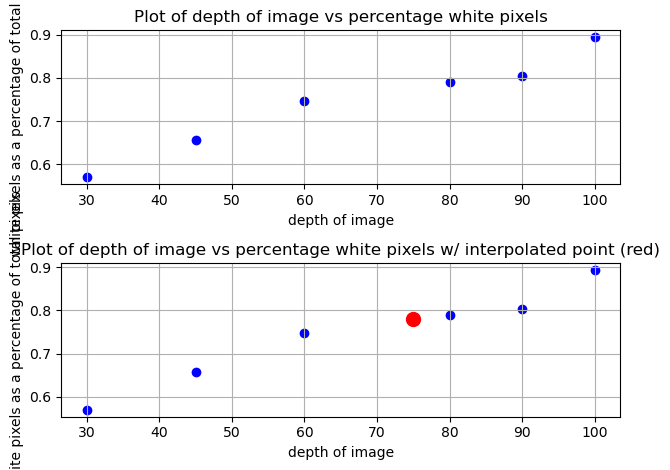

In [ ]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    "MASK_Sk658 Llobe ch010017.jpg",
    "MASK_Sk658 Llobe ch010018.jpg",
    "MASK_Sk658 Llobe ch010019.jpg",
    "MASK_Sk658 Llobe ch010021.jpg",
    "MASK_Sk658 Llobe ch010022.jpg",
    "MASK_Sk658 Llobe ch010023.jpg"
]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    45,
    90,
    60,
    30,
    80,
    100
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage

# interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))
# had to hard code in the Jupyter notebook but this code works in a .py file
interpolate_depth = 75.0

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## Verify and validate your analysis: 
* What does the literature suggest?
Volumetric characteristics of idiopathic pulmonary fibrosis lungs: computational analyses of high-resolution computed tomography images of lung lobes
“For the IPF subjects, the group-average radiological scores for subpleural reticulation, traction bronchiectasis/bronchiolectasis, ground-glass opacification, and honeycombing were highest in the lower section of the lung and lowest in the upper section”
* Trends in our scatterplot
Fibrosis development increases with lung depth in the animal models used in this study. 
How did we determine which interpolation estimate was the most accurate?
Interpolated % value at 2500um = 1.62815
% value average between given depths of 2400um and 2600um = 1.62815
* Current literature confirms our findings – indicators for progression of IPF are more prevalent in lower sections of the lungs. Within our data set, our interpolated data values are simialr to and in some cases exactly match the provided data points.

## Conclusions and Ethical Implications: 
* With our murine Bleomycin model of IPF, it is evident that fibrotic lesions increase in prevalence in deeper sections of the lung lobes. 
Interpolation techniques may be used to develop accurate mathematical estimates of fibrotic development in depths of the lung which have not been sectioned, saving resources, time, and money.
* Ethical Implications: 
Our findings inform providers to ensure full assessments of the lung are carried out for all patients at risk of IPF, since a lack of fibrosis in the upper sections of the lung does not necessarily imply that the lower sections represent a similar progression. 


## Limitations and Future Work: 
* Future Work: 
How can image analysis be further developed to remove “false” staining of blood vessels in imaged sections? How would this improvement in analysis technique affect the outcomes of an analogous study? How can models be made that fit specific sections of the data where linear, quadratic, or cubic interpolation are most accurate?

## NOTES FROM YOUR TEAM: 
10/2/2025 - Introductions and checkups on confidence with Python coding skills. Getting a background of the problem we will be investigating.

10/7/2025 - Learning about inteprolation with a data set, practicing code in Python for interpolating and graphing. Getting started with our        Jupyter notebook for the first check-in (Title, Project goals, Data-set details, Data analysis code)

## QUESTIONS FOR YOUR TA: 
We have no questions for our TA at this time.